# Locational Marginal Price

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp
from datetime import datetime
from pytz import timezone

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format


Bad key legend.labelcolor in file style.txt, line 43 ('legend.labelcolor: black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


### Load files

In [2]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ["scenario_190"]
folder_to_save_results="results/"
savefig = False

In [3]:
fname = "load_balance.csv"
load_balance= get_data_sftp(hostname, username, scenario_name, fname)

In [4]:
load_balance

,load_zone,timestamp,normalized_energy_balance_duals_dollar_per_mwh,ZoneTotalCentralDispatch,TXPowerNet,zone_demand_mw,StorageNetCharge,scenario
0,AZ_APS_E,2020011602,46.22,"1,731.30","-1,476.10",-255.17,0.00,scenario_190
1,AZ_APS_E,2020011606,46.21,"1,738.60","-1,508.40",-230.20,0.00,scenario_190
2,AZ_APS_E,2020011610,44.32,"1,731.30","-1,526.90",-204.41,0.00,scenario_190
3,AZ_APS_E,2020011614,46.22,"1,714.90","-1,451.50",-263.41,0.00,scenario_190
4,AZ_APS_E,2020011618,40.06,"1,636.50","-1,372.90",-263.56,0.00,scenario_190
...,...,...,...,...,...,...,...,...
28795,WY_SW,2050122107,134.60,106.89,218.88,-325.77,0.00,scenario_190
28796,WY_SW,2050122111,130.71,84.70,192.87,-277.57,0.00,scenario_190
28797,WY_SW,2050122115,134.60,155.82,135.94,-291.76,0.00,scenario_190
28798,WY_SW,2050122119,92.65,730.02,-460.61,-269.41,0.00,scenario_190


In [5]:
#Months
m72_ticks=['Jan', ' ',' ', ' ',' ', ' ', 
         'Feb', ' ',' ', ' ',' ', ' ',
         'Mar ', ' ',' ', ' ',' ', ' ',
         'Apr ', ' ',' ', ' ',' ', ' ',
         'May ', ' ',' ', ' ',' ', ' ',
         'Jun ', ' ',' ', ' ',' ', ' ',
         'Jul ', ' ',' ', ' ',' ', ' ',
         'Aug ', ' ',' ', ' ',' ', ' ',
         'Sep ', ' ',' ', ' ',' ', ' ',
         'Oct ', ' ',' ', ' ',' ', ' ',
         'Nov ', ' ',' ', ' ',' ', ' ',
         'Dec ', ' ',' ', ' ',' ', ' ']

m12_ticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']  

### Analysis of average LMP in California

In [6]:
#Filter data to California
LMP_ca=load_balance[load_balance.load_zone.str.startswith('CA_')]
LMP_ca=LMP_ca.reset_index(drop=True)
LMP_ca.drop(["StorageNetCharge", "TXPowerNet", "ZoneTotalCentralDispatch","zone_demand_mw"], axis=1, inplace=True)
LMP_ca=LMP_ca.rename(columns={'normalized_energy_balance_duals_dollar_per_mwh':'LMP'})
LMP_ca


,load_zone,timestamp,LMP,scenario
0,CA_IID,2020011602,47.26,scenario_190
1,CA_IID,2020011606,47.26,scenario_190
2,CA_IID,2020011610,44.94,scenario_190
3,CA_IID,2020011614,46.97,scenario_190
4,CA_IID,2020011618,40.95,scenario_190
...,...,...,...,...
6907,CA_SMUD,2050122107,"1,092.00",scenario_190
6908,CA_SMUD,2050122111,"1,092.00",scenario_190
6909,CA_SMUD,2050122115,145.58,scenario_190
6910,CA_SMUD,2050122119,102.70,scenario_190


In [7]:
#Select the range of time
initial_date=2050010300
final_date=2050123120

initial_date=datetime.strptime(str(initial_date), '%Y%m%d%H').astimezone(timezone('US/Pacific'))
final_date=datetime.strptime(str(final_date), '%Y%m%d%H').astimezone(timezone('US/Pacific'))

LMP_ca["timestamp"]=pd.to_datetime(LMP_ca["timestamp"], format='%Y%m%d%H')
LMP_ca["timestamp"]=LMP_ca["timestamp"].dt.tz_localize('utc')
LMP_ca["timestamp"]=LMP_ca["timestamp"].dt.tz_convert('US/Pacific')

LMP_ca=LMP_ca[initial_date <= LMP_ca.timestamp]
LMP_ca=LMP_ca[LMP_ca.timestamp <= final_date]
LMP_ca

,load_zone,timestamp,LMP,scenario
432,CA_IID,2050-01-12 19:00:00-08:00,141.28,scenario_190
433,CA_IID,2050-01-12 23:00:00-08:00,141.28,scenario_190
434,CA_IID,2050-01-13 03:00:00-08:00,141.28,scenario_190
435,CA_IID,2050-01-13 07:00:00-08:00,141.28,scenario_190
436,CA_IID,2050-01-13 11:00:00-08:00,0.00,scenario_190
...,...,...,...,...
6907,CA_SMUD,2050-12-20 23:00:00-08:00,"1,092.00",scenario_190
6908,CA_SMUD,2050-12-21 03:00:00-08:00,"1,092.00",scenario_190
6909,CA_SMUD,2050-12-21 07:00:00-08:00,145.58,scenario_190
6910,CA_SMUD,2050-12-21 11:00:00-08:00,102.70,scenario_190


In [8]:
LMP_ca_av = LMP_ca.pivot_table(
    index=[
        "timestamp",
    ],
    columns="scenario",
    values="LMP",
    aggfunc=np.mean,
)

LMP_ca_av = LMP_ca_av.reindex(columns=scenario_name)


In [9]:
LMP_ca_av.index.weekofyear

<ipython-input-9-85ec3a43953b>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  LMP_ca_av.index.weekofyear


Int64Index([ 2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
            ...
            49, 49, 49, 49, 51, 51, 51, 51, 51, 51],
           dtype='int64', name='timestamp', length=144)

In [10]:
#Input hours_per_year (from timestamp.csv - output file)
hours_per_year=4.0137

In [11]:
hourly_LMP_ca_per_week=LMP_ca_av.groupby([LMP_ca_av.index.isocalendar().week, LMP_ca_av.index.hour]).mean()

get_index=hourly_LMP_ca_per_week.index

hourly_LMP_ca_per_week=hourly_LMP_ca_per_week.reset_index(drop=True)

hourly_LMP_ca_per_week=hourly_LMP_ca_per_week.set_index([np.arange(1,53,1/6)])

hourly_LMP_ca_per_week.insert(0,"week-hour",get_index)

hourly_LMP_ca_per_week[scenario_name]*=1/hours_per_year

hourly_LMP_ca_per_week

ValueError: Length mismatch: Expected 144 rows, received array of length 312

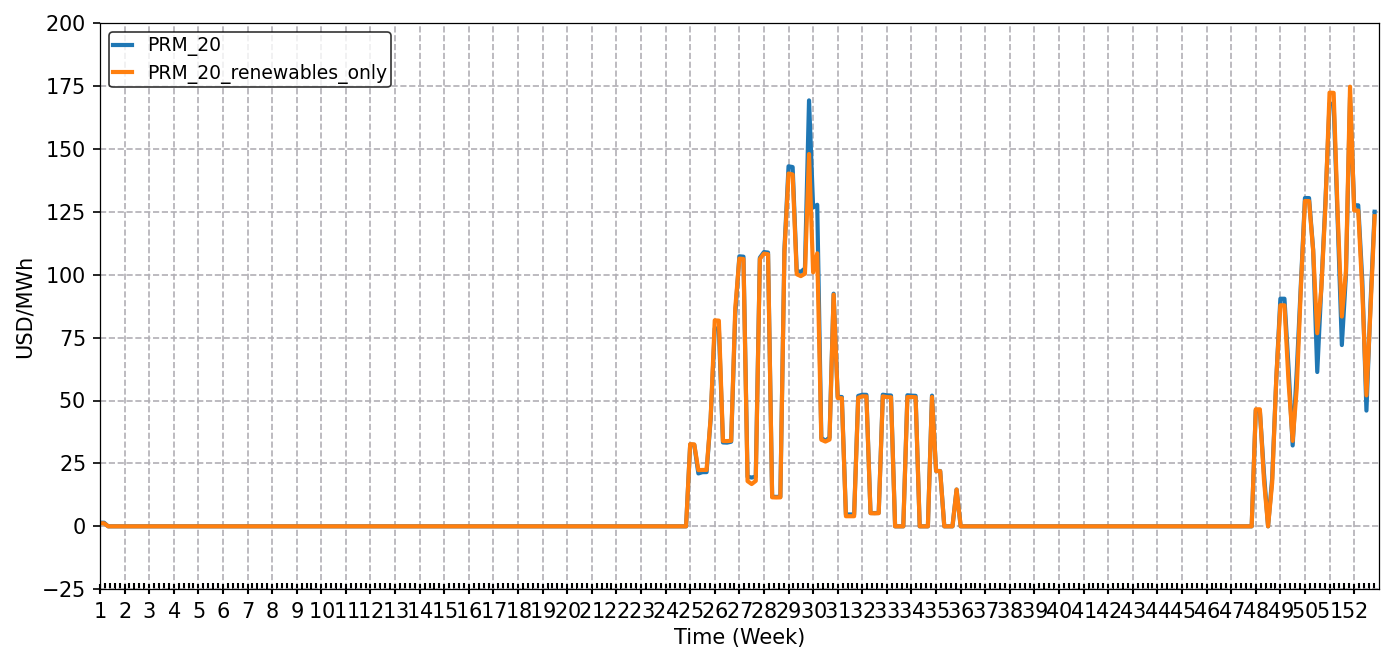

In [ ]:
# Plot
fig = plt.figure(figsize=(11,5), dpi=150)

fig.patch.set_facecolor('white')

ax=fig.add_subplot(111)

ax=hourly_LMP_ca_per_week.plot.line(ax=ax)

# Label configuration
ax.set_ylabel("USD/MWh")
ax.set_xlabel("Time (Week)")

ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')

#ax.xaxis.set_ticks(major_ticks)
#ax.set_xticklabels(m72_ticks)

ax.set_xlim(left=1)
ax.set_xlim(right=53)
ax.minorticks_on()
ax.set_xticks(np.linspace(1,52,52))
ax.yaxis.set_tick_params(which='minor', bottom=False)
ax.xaxis.set_tick_params(which='major', length=5, width=1, direction='inout')
ax.xaxis.set_tick_params(which='minor', length=3, width=1, direction='in')

#handles, labels = ax.get_legend_handles_labels()
ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

plt.savefig(folder_to_save_results+"Hourly average long-term LMP per week in California.png", transparent=False)


In [ ]:
hourly_LMP_ca_per_month=LMP_ca_av.groupby([LMP_ca_av.index.month, LMP_ca_av.index.hour]).mean()

get_index=hourly_LMP_ca_per_month.index

hourly_LMP_ca_per_month=hourly_LMP_ca_per_month.reset_index(drop=True)

hourly_LMP_ca_per_month=hourly_LMP_ca_per_month.set_index([np.arange(1,13,1/6)])

hourly_LMP_ca_per_month.insert(0,"month-hour",get_index)

hourly_LMP_ca_per_month[scenario_name]*=1/hours_per_year

hourly_LMP_ca_per_month

scenario,month-hour,PRM_20,PRM_20_renewables_only
1.00,"(1, 0)",0.35,0.29
1.17,"(1, 4)",0.35,0.29
1.33,"(1, 8)",0.00,0.00
1.50,"(1, 12)",0.00,0.00
1.67,"(1, 16)",0.00,0.00
...,...,...,...
12.17,"(12, 4)",122.80,122.69
12.33,"(12, 8)",89.85,87.62
12.50,"(12, 12)",46.26,53.89
12.67,"(12, 16)",79.15,76.87


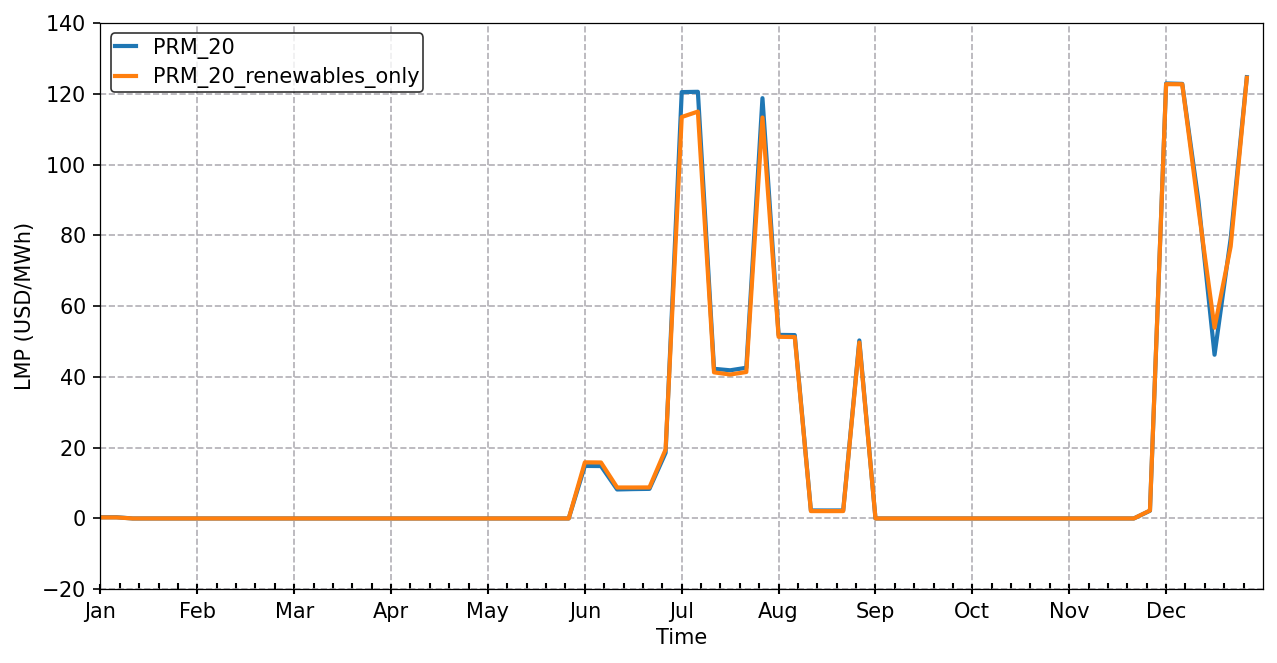

In [ ]:
# Plot
fig = plt.figure(figsize=(10,5), dpi=150)

fig.patch.set_facecolor('white')

ax=fig.add_subplot(111)

ax=hourly_LMP_ca_per_month[scenario_name].plot.line(ax=ax)

# Label configuration
ax.set_ylabel("LMP (USD/MWh)")
ax.set_xlabel("Time")

ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')

#ax.xaxis.set_ticks(major_ticks)
#ax.set_xticklabels(m72_ticks)

ax.set_xlim(left=1)
ax.set_xlim(right=13)
ax.minorticks_on()
ax.set_xticks(np.linspace(1,12,12), m12_ticks)


ax.yaxis.set_tick_params(which='minor', bottom=False)
ax.xaxis.set_tick_params(which='major', length=5, width=1, direction='inout')
ax.xaxis.set_tick_params(which='minor', length=3, width=1, direction='in')


#handles, labels = ax.get_legend_handles_labels()
ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="best",
    fontsize=10,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

plt.savefig(folder_to_save_results+"Hourly average long-term LMP per month in California.png", transparent=False)


In [ ]:
daily_LMP_ca_per_month=LMP_ca_av.groupby([LMP_ca_av.index.month, LMP_ca_av.index.day]).mean()

get_index=daily_LMP_ca_per_month.index

daily_LMP_ca_per_month=daily_LMP_ca_per_month.reset_index(drop=True)

daily_LMP_ca_per_month=daily_LMP_ca_per_month.set_index([pd.date_range(start=initial_date,end=final_date, tz='US/Pacific')])

daily_LMP_ca_per_month.insert(0,"month-day",get_index)

daily_LMP_ca_per_month[scenario_name]*=1/hours_per_year

daily_LMP_ca_per_month

scenario,month-day,PRM_20,PRM_20_renewables_only
2050-01-03 00:00:00-08:00,"(1, 3)",3.34,2.84
2050-01-04 00:00:00-08:00,"(1, 4)",0.00,0.00
2050-01-05 00:00:00-08:00,"(1, 5)",0.00,0.00
2050-01-06 00:00:00-08:00,"(1, 6)",0.00,0.00
2050-01-07 00:00:00-08:00,"(1, 7)",0.00,0.00
...,...,...,...
2050-12-27 00:00:00-08:00,"(12, 27)",125.05,121.73
2050-12-28 00:00:00-08:00,"(12, 28)",105.42,102.99
2050-12-29 00:00:00-08:00,"(12, 29)",92.93,91.55
2050-12-30 00:00:00-08:00,"(12, 30)",81.42,85.93


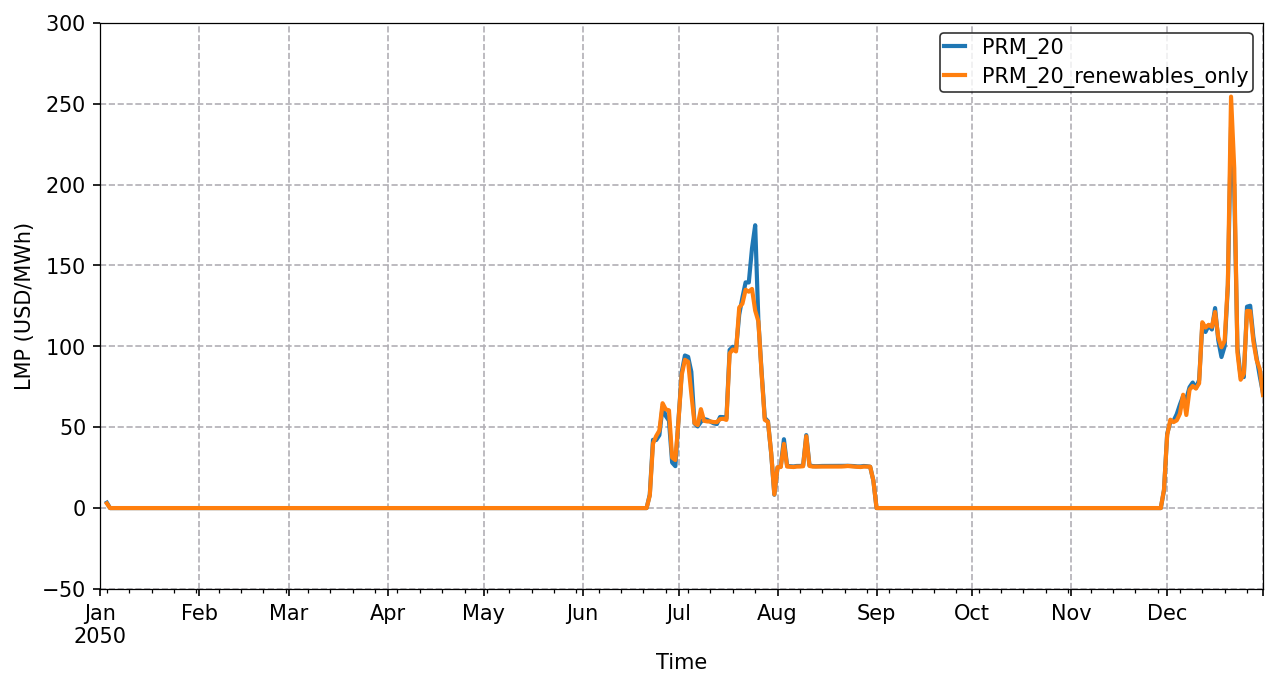

In [ ]:
# Plot
fig = plt.figure(figsize=(10,5), dpi=150)

fig.patch.set_facecolor('white')

ax=fig.add_subplot(111)

ax=daily_LMP_ca_per_month[scenario_name].plot.line(ax=ax)

# Label configuration
ax.set_ylabel("LMP (USD/MWh)")
ax.set_xlabel("Time")

ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')

ax.set_xlim(left=datetime(2050, 1, 1, 0, 0))

ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="best",
    fontsize=10,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

plt.savefig(folder_to_save_results+"Daily long-term LMP per month in California.png", transparent=False)